In [282]:
import numpy as np
from Climate import Country

In [339]:
poland = Country('Poland')

In [340]:
data = poland.data()

In [341]:
def fit(X):
    
    means = []
    for i in range(len(X) // 12):
        means.append(np.mean(X[12*i:(i+1)*12]))
        
    a, b = np.polyfit(np.arange(len(means)), np.array(means), 1)
    print(a, b)
    
    return a, b

In [342]:
def predict(series, horizon):
    
    a, b = fit(series)
    
    preds = []
    for year in range(1 + horizon // period):
        for month in range(period, 0, -1):
            preds.append(series[-month]+(year+1)*a)
            
    return np.array(preds[:horizon])

In [343]:
years = 30
series = data.AverageTemperature.values[:-years*12]
y = data.AverageTemperature.values[-years*12:]
y_hat = predict(series, years*12)
fully = data.AverageTemperature.values[-(years+2)*12:]
print(np.mean((y-y_hat)**2))

0.003935757795878736 6.761045101230457
7.839862559953494


In [344]:
import seaborn as sns

C:\Users\mikol\anaconda3\envs\weather\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mikol\anaconda3\envs\weather\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

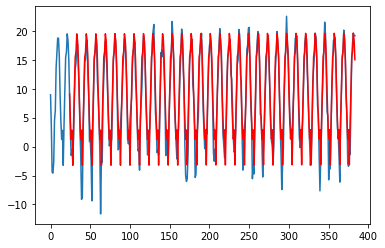

In [345]:
x = np.arange(2*period, 2*period+len(y))
x_full = np.arange(len(fully))
sns.lineplot(x_full, fully)
sns.lineplot(x, y_hat, color='red')